1. **What does the project set out to study**

   With the wave of IPOs (Initial Public Offerings) in recent years, the project aims to perform an exploratory data anlysis on recent IPOs and see if there are any interesting insights about their timing, industry, company standing (established), and other factors. In addition to the overall market trend, the project also takes a look at a few big IPOs (Snowflake, Unity Software, etc.) that happened recently and explore the correlations existed among a variety of performance metrics.

2. **What we Discovered**

   For the exploratory data anlysis part, we found that in the past 2 years: 
   1) Wednedsay and Thusday has the most IPO filed; 
   2) Companies tend to file IPO on the second half of the year (Q3Q4), especially from September to November; 
   3) 60% of the companies that filed IPO was either in healthcare or financial services sector; 4) There are no a single/a few  investment banks overwhelmingly employed as IPO managers.
   
   For analyzing key attributes and performances metrics of IPO companies, we originally make assumption that most of the correlations between attributes should be positive (and moderate). This assumption was partially confirmed but we have a striking counterexample EBITDA, which is negatively correlated to a lot of other attributes in a strong way (with correlation coefficent close to -1).
   
   


3. **How to expand or augment the project**

    One way to expand the project is to collected more data on the 730 recently filed IPOs. Specifically, I want to collect CEO info like age/salary (I actually already wrote working scraper for this but it was dropped due to long scraping time), stock price history for the first 3day/week/month after the IPO, key performance stats (like those in the top_keystats.csv) and more. With stock data for a larger timeframe and data over specific (critical) period, we can potentially develop more profound understanding on those IPOs and search for relationships among the attributes.
    
    Moreover, since we notice how COVID can possibly affect financial metrics like EBITDA, we can scale up the project by comparing stock performance at different stages of the pandemic and how does the general IPO trend shifts.

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read in the data sets

ipo_info = pd.read_csv('data/ipo_info.csv')
sp500 = pd.read_csv('data/sp500_historical.csv')
top_closing = pd.read_csv('data/top_ipo_closing.csv')
top_keystats = pd.read_csv('data/top_keystats.csv')

In [3]:
# Take a look a the columns
# The ipo_info.csv contains scraped data of 730 companies that filed IPO since 2019-02-14
ipo_info.head()

,File Date,Company,Symbol,Managers,Shares(millions),PriceLow,PriceHigh,Est $ Vol(millions),ExpectedTo Trade,Industry
0,12/4/20,"Upstart Holdings, Inc.",UPST,Goldman Sachs/ BofA Securities/ Citigroup,12.00,$20.00,$22.00,$252.00,Wednesday,NaN
1,12/3/20,17 Education & Technology Group,YQ,Goldman Sachs (Asia)/ Morgan Stanley/ BofA Se...,27.40,$10.50,$10.50,$288.80,Priced,NaN
2,12/3/20,Certara,CERT,Jefferies/ Morgan Stanley/ BofA Securities/ Cr...,24.39,$19.00,$22.00,$500.00,Friday,NaN
3,12/3/20,Concord Acquisition Corp.,CND.U,Cowen,20.00,$10.00,$10.00,$200.00,Tuesday,NaN
4,12/3/20,FinTech Acquisition Corp. V,FTCVU,Cantor,21.80,$10.00,$10.00,$218.00,Priced,NaN


In [4]:
# the s&p500 index is a stock market index that hat measures the stock performance 
# of 500 large companies listed on stock exchanges in the US
# the'percentChange'column wasn't scraped but caculated in scraper submitted in milestone 2
sp500.head()

,date,open,high,low,close,Aclose,volume,percentChange
0,12/4/20,"3,670.94","3,699.20","3,670.94","3,699.12","3,699.12","5,086,370,000",0.008836
1,12/3/20,"3,668.28","3,682.73","3,657.17","3,666.72","3,666.72","5,091,760,000",-0.000624
2,12/2/20,"3,653.78","3,670.96","3,644.84","3,669.01","3,669.01","5,029,620,000",0.001791
3,12/1/20,"3,645.87","3,678.45","3,645.87","3,662.45","3,662.45","5,403,660,000",0.011271
4,11/30/20,"3,634.18","3,634.18","3,594.39","3,621.63","3,621.63","6,291,400,000",-0.004595


In [5]:
# the next two dataset focus on a few selected IPO companies
top_keystats.head()

,symbol,marketcap,employee,revenue,grossProfit,deRatio,peRatio,EBITDA,beta
0,SNOW,1.100000e+11,2037,264748000,148191000,2.585336,-316.342572,-354566000,0.000000
1,U,4.087108e+10,3729,541779000,423182000,1.936630,-244.973192,-119556000,0.000000
2,UBER,9.676032e+10,26900,12982000000,6403000000,3.231268,-14.031369,-4497000000,1.143636
3,LYFT,1.423201e+10,5683,3267725000,1390475000,2.270547,-8.600888,-1640125500,1.464450
4,ZM,7.985240e+10,2532,1346531000,987161000,2.189619,348.991528,241452000,-0.177347


In [6]:
top_closing.head()

,symbol,date,close
0,SNOW,9/16/20,253.93
1,SNOW,9/17/20,227.54
2,SNOW,9/18/20,240.00
3,SNOW,9/21/20,228.85
4,SNOW,9/22/20,235.16


In [7]:
# To start off, we want to do a general exploratory analysis on the recently files IPOs

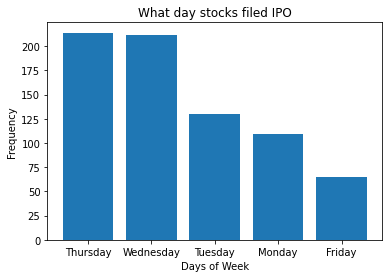

In [8]:
# To do detailed analysis on 'File Date', first create Weekday and Month columns

ipo_info['File Date'] = pd.to_datetime(ipo_info['File Date'])
ipo_info['Weekday'] = ipo_info['File Date'].dt.day_name()
ipo_info['Month'] = pd.DatetimeIndex(ipo_info['File Date']).month

fig,ax=plt.subplots()
plt.bar(ipo_info['Weekday'].value_counts().index,ipo_info['Weekday'].value_counts().values)
plt.xlabel('Days of Week')
plt.ylabel('Frequency')
plt.title('What day stocks filed IPO')
plt.show()
# we can see that most companies filed IPO on Wednesday and Thursday, and least on Friday

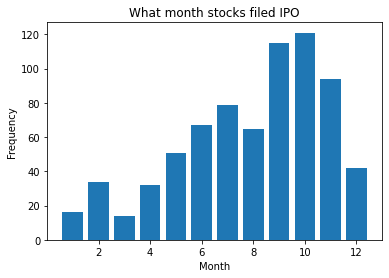

In [9]:
plt.bar(ipo_info['Month'].value_counts().index,ipo_info['Month'].value_counts().values)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('What month stocks filed IPO')
plt.show()
# Most companies seemed to file IPO in September,October and November(late Q3 & early Q4)

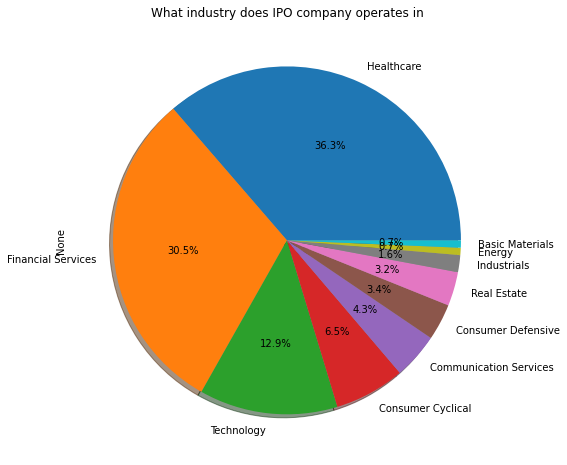

In [17]:
# now let's look at the industry
plt.figure(figsize=(12,8))
plt.title('What industry does IPO company operates in')
ipo_info.groupby('Industry')\
        .size()\
        .sort_values(ascending = False)\
        .iloc[:10]\
        .plot.pie(autopct='%1.1f%%',shadow=True)
plt.ioff()
# So about 36% of the companies that filed IPO in the last 2 years are in the Healthcare inudstry
# followed by 30% in Financial Services and 13% in Technology sectors

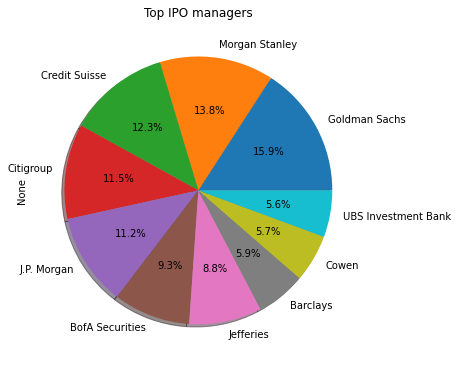

In [18]:
# And who are the biggest IPO managers?

# each value under 'Managers' column might contain one or multiple manager
managers = []
for i in ipo_info['Managers']:
    managers.append(i.split('/ ')) # split the string
flat_lst = [item for sublist in managers for item in sublist]
dfManager = pd.DataFrame(flat_lst)

plt.figure(figsize=(6,8))
plt.title('Top IPO managers')
dfManager.groupby(0)\
        .size()\
        .sort_values(ascending = False)\
        .iloc[:10]\
        .plot.pie(autopct='%1.1f%%',shadow=True)
plt.ioff()
# We plot out only the top 10 managers
# Here we Goldman Sachs as the no.1 IPO manager employed by companies for the last 2 years
# closely followed by Morgan Stanley, Credit Suisse, Citigroup and J.P.Morgan

In [19]:
# Now we move to analyzing some of the most anticipated IPOs in the past 2 years:
# Snowflake(SNOW), Unity(U), Uber(UBER), Lyft(LYFT), and ZOOM(ZM)

In [20]:
# To compare the daily percent change with the S&P500 values, we need to first calculate them
percentChange = []
for i in range(len(top_closing)):
    if i>0 and top_closing['symbol'].iloc[i] == top_closing['symbol'].iloc[i-1]:
        change = top_closing['close'].iloc[i]/top_closing['close'].iloc[i-1] - 1
        percentChange.append(change)
    else:
        percentChange.append(0)
top_closing['percentChange2'] = percentChange

In [21]:
top_closing.head()

,symbol,date,close,percentChange2
0,SNOW,9/16/20,253.93,0.000000
1,SNOW,9/17/20,227.54,-0.103926
2,SNOW,9/18/20,240.00,0.054760
3,SNOW,9/21/20,228.85,-0.046458
4,SNOW,9/22/20,235.16,0.027573


In [22]:
# select only date and percentChange from s&p500
sp500_short = sp500[['date', 'percentChange']] 
# merge two dataframes based on date
df = pd.merge(top_closing, sp500_short, on=['date','date'])

# Check if our selected stock has higher percent change on certain day than s&p500
positive = []
for i in range(len(top_closing)):
    if df['percentChange2'].iloc[i] >= df['percentChange'].iloc[i]:
        positive.append(1)
    else:
        positive.append(0)
df['positive'] = positive
df = df.sort_values(['date'], ascending=[True])
# print(df)

# Count dayPositive: the number of days where the stock performs better than s&p500 (higher %change)
df2 = df.groupby('symbol').sum()['positive']
print(df2)
# This dayPositive attribute might be a useful indicator of how well the stock performs 
# compared to a common index
# So we cant insert this column into the company keystats dataframe

symbol
LYFT    37
SNOW    31
U       32
UBER    32
ZM      35
Name: positive, dtype: int64


In [23]:
# add the dayPositive column to keystats
top_keystats = pd.merge(top_keystats,df2, on=['symbol','symbol'])

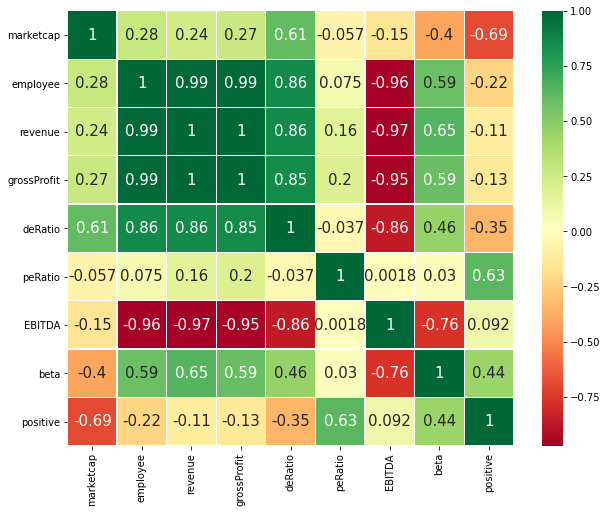

In [24]:
# Heat map can be used to understand various correalations between the parameters
# Let's draw a heat map for the important stock attributes
fig=sns.heatmap(top_keystats[['marketcap', 'employee', 'revenue','grossProfit',
                'deRatio', 'peRatio', 'EBITDA', 'beta','positive']].corr(),
                annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [25]:
# Attributes here are mostly important performance indicators of how a company is doing
# And they contain useful information for us when choosing whether to buy a stock or not
# In theory, we expect to see most of the correlations to be positive and moderate to strong

# However, one of the attributes greatly defy our assumption: EBITDA!
# EBITDA stands for Earnings Before Interest, Taxes, Depreciation, and Amortization 
# and is a metric used to evaluate a company's operating performance (proxy for cash flow)
# Here, for instance, both grossProfit and EBITDA are financial metrics that measure a company's profitability
# so a positive and moderate correlation is expected (along with revenue)
# But we see a very strong negative correlation of -0.95! (and similar values for other metrics)
# How did that happen?

In [26]:
top_keystats.head()
# Going back to the original data, we see a lot of very large negative values for EBITDA

,symbol,marketcap,employee,revenue,grossProfit,deRatio,peRatio,EBITDA,beta,positive
0,SNOW,1.100000e+11,2037,264748000,148191000,2.585336,-316.342572,-354566000,0.000000,31
1,U,4.087108e+10,3729,541779000,423182000,1.936630,-244.973192,-119556000,0.000000,32
2,UBER,9.676032e+10,26900,12982000000,6403000000,3.231268,-14.031369,-4497000000,1.143636,32
3,LYFT,1.423201e+10,5683,3267725000,1390475000,2.270547,-8.600888,-1640125500,1.464450,37
4,ZM,7.985240e+10,2532,1346531000,987161000,2.189619,348.991528,241452000,-0.177347,35


In [27]:
# Usually, a negative EBITDA means the company is facing some operational difficulties
# Negative EBITDA is bad, and for mature companies it suggests that possibly they are 
# not making enough to keep its capital needs maintained

# Since the data are updated to Q3 2020, one very possible explainaiton is COVID-19 influence
# Cash burn problem is getting worse in the US as COVID spreads, even for large corporations
# Their normal business activties are more or less hindered by the pandemic
# The entire economy is affected, so that may explain why we see negative EBITDA across firms
# It also explains why Zoom(ZM) has a positive and reasonably high EBITDA :)

In [28]:
# We also don't have a lot of data (companies) in the dataset so these correlations might
# not be very realible

In [29]:
# Finally, let's see how these 5 stocks performs over the past 3 months

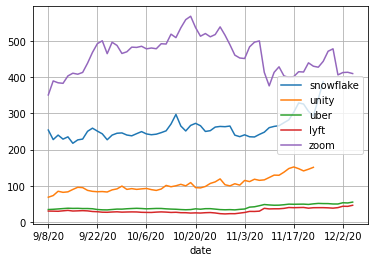

In [32]:
# split data by symbol
# set date as index, drop extra column
# rename column before plotting all lines in one graph
dfs = dict(tuple(top_closing.groupby('symbol')))
snow = dfs['SNOW'].set_index('date').drop(columns='percentChange2')
snow.rename(columns={'close':'snowflake'}, inplace=True)
unity = dfs['U'].set_index('date').drop(columns='percentChange2')
unity.rename(columns={'close':'unity'}, inplace=True)
uber = dfs['UBER'].set_index('date').drop(columns='percentChange2')
uber.rename(columns={'close':'uber'}, inplace=True)
lyft = dfs['LYFT'].set_index('date').drop(columns='percentChange2')
lyft.rename(columns={'close':'lyft'}, inplace=True)
zoom = dfs['ZM'].set_index('date').drop(columns='percentChange2')
zoom.rename(columns={'close':'zoom'}, inplace=True)

ax = snow.plot()
ax = unity.plot(ax=ax)
ax = uber.plot(ax=ax)
ax = lyft.plot(ax=ax)
ax = zoom.plot(ax=ax).grid()

In [31]:
# During COVID-19, we see how Zoom has a much higher (but fluctuating) stock price
# The stock price for Uber and Lyft remain low
# The stock price for technology companies (Snowflake,Unity) are relatively high and stable